# Deep Learning

# Assignment 2 -CNN

### Submitted by:
#### Name      : Muhammad Amin Ghias
#### ERP ID    : 25366

Date : 26th November 2022

# Dataset -3 FaceMask Dataset 

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5290254580320828321
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1358095566
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11260425199139236693
physical_device_desc: "device: 0, name: NVIDIA GeForce MX330, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [ ]:
tf.config.experimental.get_memory_info("/device:GPU:0")['current']

In [ ]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())

In [ ]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

In [ ]:
# ! pip install --upgrade pip
# ! pip install scikit-image
# ! pip install pandas
# ! pip install seaborn
# ! pip install -U scikit-learn
# ! pip install seaborn
# ! pip install opencv-python

# Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

In [4]:
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers
import random as rnd
import cv2
import matplotlib.image as mpimg
from PIL import Image
from keras.utils import np_utils
import tensorflow
from tensorflow.keras import optimizers

import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.layers import AveragePooling2D
from keras.layers import MaxPooling2D

from keras.callbacks import ModelCheckpoint

from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential, load_model

from keras.layers import LeakyReLU

from datetime import datetime



# Initial Data preprocessing

### Data will be put through following data processing:

##### 1) Making intial dataset with image paths, directories and names

##### 2) Reading images 

##### 3) Converting images to array

##### 4) Reszizing image 

##### 5) Forming final dataset with image array, image path, image name, image class etc

##### 6) Making train test datsest

##### 7) Normalizing the train , test data

## 1) Making Dataset

In [17]:
data = pd.DataFrame()
main_path = 'dataset/'
name=[]


pa = 'dataset'

entry = []
for filename in os.listdir(pa):
    entry.append(filename)

l=[]
for i in entry:
    name.append(os.listdir('dataset/'+i))
    l.append(i)

len(name)

pn=[]
paths = []
classes = []
for i in range(len(name)):
    for j in name[i]:
        pn.append(j)
        paths.append(main_path+str(i)+'/'+j)
        classes.append(i)

print(l)

print(len(name))
      
print(len(pn))

print(len(paths))

# pn

data['images_name']= pn
# classes = []
# paths = []
# for image in data['images_name']:
# #     class_ = image.split('_')[0]
    
# #     if class_ == 'Ala':
# #         class_='Ala_Idris'
        
# #     classes.append(int(class_))
#     paths.append(main_path+str(int(class_))+'/'+image)

data['classes'] = classes
data['path'] = paths
print(len(data))
data.head()

['0', '1']
2
1376
1376
1376


,images_name,classes,path
0,0.jpg,0,dataset/0/0.jpg
1,1.jpg,0,dataset/0/1.jpg
2,10.jpg,0,dataset/0/10.jpg
3,100.jpg,0,dataset/0/100.jpg
4,101.jpg,0,dataset/0/101.jpg


In [18]:
li = data.classes.unique()

li=list(li)


In [19]:
li

[0, 1]

## 2) Reading images  3) Converting images to array  4) Reszizing image 

In [20]:
df = data.copy()
im = []
pic = []
label = []
INPUT_SIZE=128



for i in range(len(df)):
    
    p = df.loc[i,'path']
    c = df.loc[i,'classes']


    image=cv2.imread(p)
#     print(image)
    image=Image.fromarray(image,'RGB')

    #resize the image
    image=image.resize((INPUT_SIZE,INPUT_SIZE))
    #append image arry in dataset list and its label in label list
    im.append(np.array(image))
    

    
    pic.append(image)
#     label.append(cl)



## 5) Forming final dataset with image array, image path, image name, image class etc

In [21]:
dataset = im

print(type(im))
# print(type(label))

dataset=np.array(dataset)
# label=np.array(label)

print(type(dataset))
# print(type(label))

<class 'list'>
<class 'numpy.ndarray'>


<ipython-input-22-ad9a3bf570cb>:3: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  pi = np.array(pic)
<ipython-input-22-ad9a3bf570cb>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pi = np.array(pic)


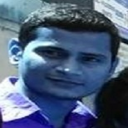

In [22]:
df['im_array']= im
# df['label']=label
pi = np.array(pic)
df['pic']=pi
df.loc[1,'pic']

In [23]:
df.shape

(1376, 5)

In [24]:
label=df.classes
type(label)

pandas.core.series.Series

In [34]:
label

0       0
1       0
2       0
3       0
4       0
       ..
1371    1
1372    1
1373    1
1374    1
1375    1
Name: classes, Length: 1376, dtype: int64

In [33]:
len(li)

2

## 6) Making train test datsest  7) Normalizing the train , test data

## Splitting data into train test 

In [35]:
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 42)
              
print(x_train.shape) 
print(y_train.shape) 

x_train = normalize( x_train, axis =1)
x_test = normalize( x_test, axis =1)

num_classes = len(li)

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


(1100, 128, 128, 3)
(1100,)


In [36]:
num_classes

2

## Making a image preprocessing augmentation for CNN input

### Data will be put through following image processing before being given to CNN:

##### 1) flips (horizaontal_vertical)

##### 2) Zooming

##### 3) Shifting (height and width)

##### 4) Rotation 

In [38]:

datagen_preprocessing =ImageDataGenerator(                                          
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     fill_mode='nearest')

# Building Model

#### Making a dataset to store results in

In [39]:
df_r=pd.DataFrame(columns=['activation_function','number_filters','pooling','epochs','test_accuracy'])

df_r

,activation_function,number_filters,pooling,epochs,test_accuracy


### Making a function model for our use

### Note:

For this model we have used Adam optimizer (which was found performing better than RMSprop) as Adam mostly gives bteer results

The Learning rate of Adam is 0.001

We have used following callbacks in fitting:

    1) Early Stopping:
    
        i) patience = 25 (that is if the best results dont improve after 15 epochs the model will stop early)
        
        ii) baseline = 0.2 (if models val-accuracy doesnt imporve than 0.2 in the patinece interval of 25 epochs model will stop early)
        
        iii) monitroing val-accuracy (test set accuracy)
        
    2)  ModelCheckpoint -(Which will save the results of epoch which gives maximum accuracy)

In [40]:
def CNN_model(filt,activation_function,pool,epoch):

    model = Sequential()
    model.add(Conv2D(filters=filt, kernel_size=(3,3), input_shape=(x_train.shape[1:]), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
    
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=filt, kernel_size=(3,3), activation=activation_function))
    if pool== 'max':
        model.add(MaxPooling2D((2,2)))
    elif pool == 'average':
        model.add(AveragePooling2D((2,2)))
#     model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Flatten())
    # model.add(Dense(units=512, activation="relu"))
    # model.add(BatchNormalization())
    model.add(Dense(units=512, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=256, activation=activation_function))
    model.add(BatchNormalization())
    # model.add(Dropout(0.5))
    model.add(Dense(units=64, activation=activation_function))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(units=num_classes,  activation="softmax"))

    model.summary()


    batch_size = 32

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    
#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


    # Let's train the model_1 using RMSprop
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

    
    
    es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)

    
#     reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=4, min_lr=0.0005)

    filepath = 'model_'+str(filt)+'_'+str(activation_function)+'_'+str(pool)+'.hdf5'
#     filepath = 'my_best_model.hdf5'
    checkpoint = ModelCheckpoint( 
                                filepath=filepath,
                                 monitor='val_accuracy',
                                 verbose=1, 
                                 save_best_only=True,
                                 mode='max')
    
    now = datetime.now
    t= now()


    history = model.fit(datagen_preprocessing.flow(x_train,y_train,
                                        batch_size=batch_size, 
                                        seed=27,
                                        shuffle=False),
                                batch_size=batch_size,
                                epochs=epoch,
                                validation_data=(x_test, y_test),
                                callbacks=[checkpoint,es],
                                shuffle=True)



    print('Training time: %s' % (now() - t))
    
    
    model_l2 = load_model(filepath)

    score = model_l2.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    global df_r
    
    df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,
                        'epochs':epoch,'test_accuracy':score[1]},ignore_index=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 62)      1736      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 62)       0         
 2D)                                                             
                                                                 
 batch_normalization_7 (Batc  (None, 63, 63, 62)       248       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 62)        34658     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 62)       0         
 2D)                                                             
                                                      

35/35 [==============================] - 10s 293ms/step - loss: 0.2015 - accuracy: 0.9218 - val_loss: 1.3556 - val_accuracy: 0.5688
Epoch 16/30
35/35 [==============================] - ETA: 0s - loss: 0.1719 - accuracy: 0.9227
Epoch 16: val_accuracy improved from 0.78986 to 0.91304, saving model to model_62_relu_max.hdf5
35/35 [==============================] - 12s 332ms/step - loss: 0.1719 - accuracy: 0.9227 - val_loss: 0.2603 - val_accuracy: 0.9130
Epoch 17/30
35/35 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9418
Epoch 17: val_accuracy did not improve from 0.91304
35/35 [==============================] - 11s 298ms/step - loss: 0.1432 - accuracy: 0.9418 - val_loss: 0.8725 - val_accuracy: 0.6594
Epoch 18/30
35/35 [==============================] - ETA: 0s - loss: 0.1538 - accuracy: 0.9409
Epoch 18: val_accuracy did not improve from 0.91304
35/35 [==============================] - 11s 309ms/step - loss: 0.1538 - accuracy: 0.9409 - val_loss: 3.2286 - val_accu

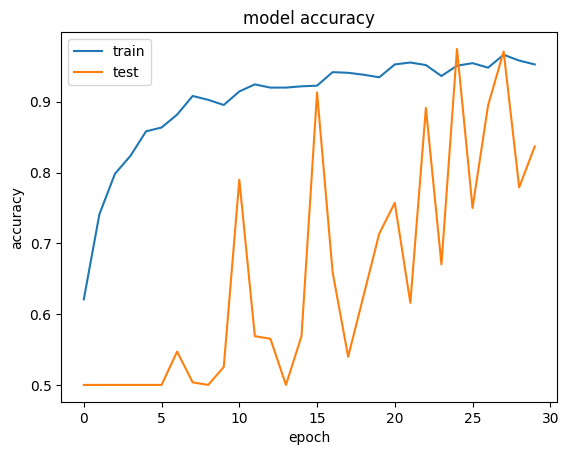

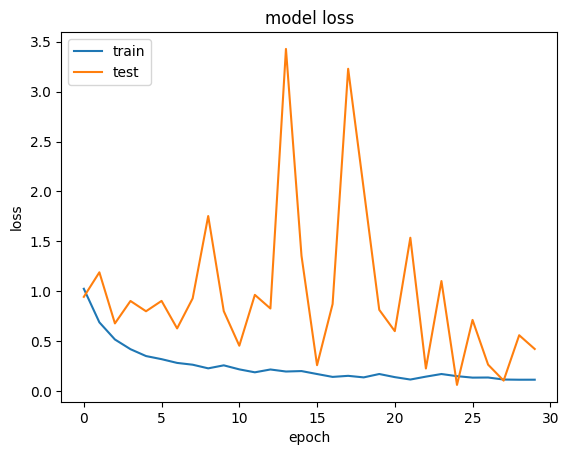

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [41]:
CNN_model(62,'relu','max',30)

# Find the best Relu Variants

In [42]:
act=['relu','elu','gelu','selu','LeakyReLU']

# act2=['selu','LeakyReLU']

#### Best activation with max pooling

relu
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_14 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                 

35/35 [==============================] - 10s 283ms/step - loss: 0.1840 - accuracy: 0.9373 - val_loss: 0.5308 - val_accuracy: 0.7790
Epoch 16/25
35/35 [==============================] - ETA: 0s - loss: 0.1404 - accuracy: 0.9445
Epoch 16: val_accuracy improved from 0.83696 to 0.88768, saving model to model_64_relu_max.hdf5
35/35 [==============================] - 11s 300ms/step - loss: 0.1404 - accuracy: 0.9445 - val_loss: 0.2632 - val_accuracy: 0.8877
Epoch 17/25
35/35 [==============================] - ETA: 0s - loss: 0.1621 - accuracy: 0.9364
Epoch 17: val_accuracy did not improve from 0.88768
35/35 [==============================] - 10s 283ms/step - loss: 0.1621 - accuracy: 0.9364 - val_loss: 1.7906 - val_accuracy: 0.5978
Epoch 18/25
35/35 [==============================] - ETA: 0s - loss: 0.1425 - accuracy: 0.9473
Epoch 18: val_accuracy did not improve from 0.88768
35/35 [==============================] - 10s 282ms/step - loss: 0.1425 - accuracy: 0.9473 - val_loss: 2.6320 - val_accu

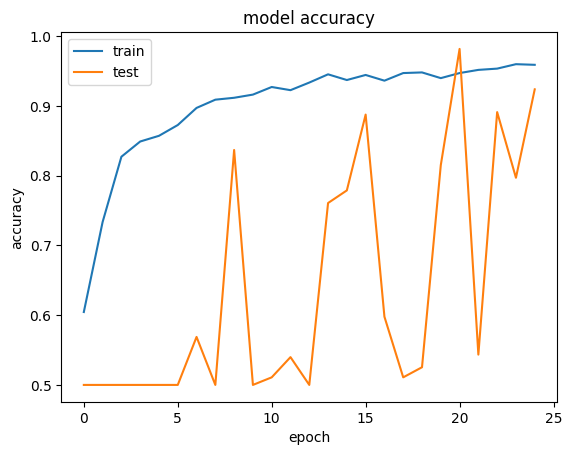

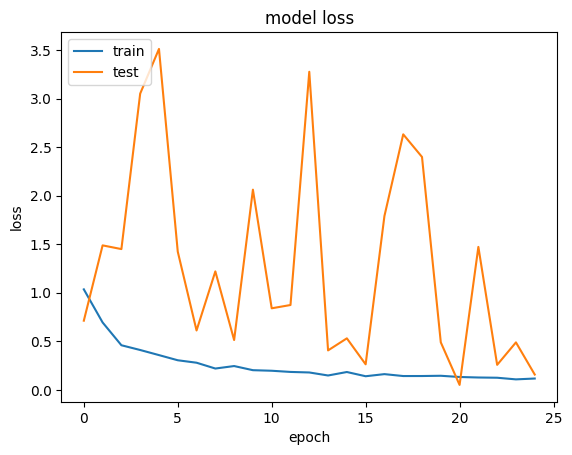

elu
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                  

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_23 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 6, 6, 64)          0         
                                                                 
 batch_normalization_24 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
          

35/35 [==============================] - ETA: 0s - loss: 0.1693 - accuracy: 0.9355
Epoch 20: val_accuracy did not improve from 0.72101
35/35 [==============================] - 12s 332ms/step - loss: 0.1693 - accuracy: 0.9355 - val_loss: 2.7783 - val_accuracy: 0.5435
Epoch 21/25
35/35 [==============================] - ETA: 0s - loss: 0.1596 - accuracy: 0.9355
Epoch 21: val_accuracy did not improve from 0.72101
35/35 [==============================] - 13s 368ms/step - loss: 0.1596 - accuracy: 0.9355 - val_loss: 1.4074 - val_accuracy: 0.6775
Epoch 22/25
35/35 [==============================] - ETA: 0s - loss: 0.1440 - accuracy: 0.9464
Epoch 22: val_accuracy improved from 0.72101 to 0.76812, saving model to model_64_elu_max.hdf5
35/35 [==============================] - 12s 350ms/step - loss: 0.1440 - accuracy: 0.9464 - val_loss: 0.5476 - val_accuracy: 0.7681
Epoch 23/25
35/35 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.9436
Epoch 23: val_accuracy improved from 

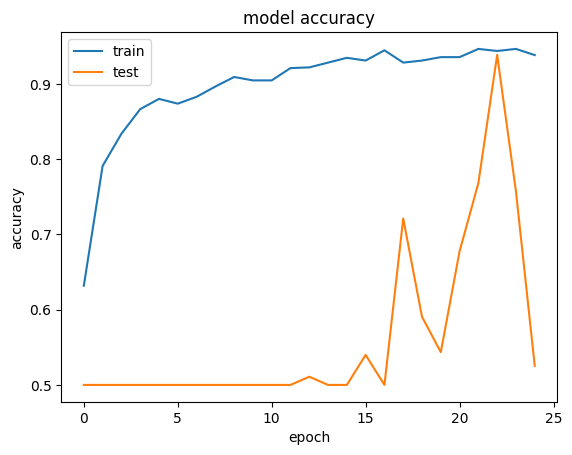

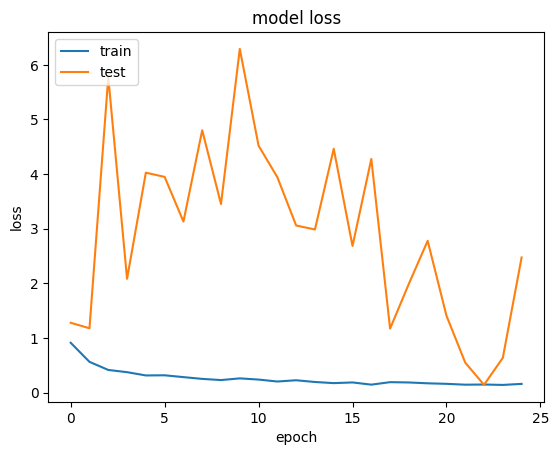

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


gelu
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                 

35/35 [==============================] - 17s 471ms/step - loss: 0.1910 - accuracy: 0.9355 - val_loss: 0.8960 - val_accuracy: 0.5652
Epoch 16/25
35/35 [==============================] - ETA: 0s - loss: 0.1745 - accuracy: 0.9255
Epoch 16: val_accuracy improved from 0.56522 to 0.91667, saving model to model_64_gelu_max.hdf5
35/35 [==============================] - 17s 493ms/step - loss: 0.1745 - accuracy: 0.9255 - val_loss: 0.2291 - val_accuracy: 0.9167
Epoch 17/25
35/35 [==============================] - ETA: 0s - loss: 0.1521 - accuracy: 0.9400
Epoch 17: val_accuracy did not improve from 0.91667
35/35 [==============================] - 16s 462ms/step - loss: 0.1521 - accuracy: 0.9400 - val_loss: 0.1906 - val_accuracy: 0.9094
Epoch 18/25
35/35 [==============================] - ETA: 0s - loss: 0.1638 - accuracy: 0.9336
Epoch 18: val_accuracy did not improve from 0.91667
35/35 [==============================] - 16s 459ms/step - loss: 0.1638 - accuracy: 0.9336 - val_loss: 5.8347 - val_accu

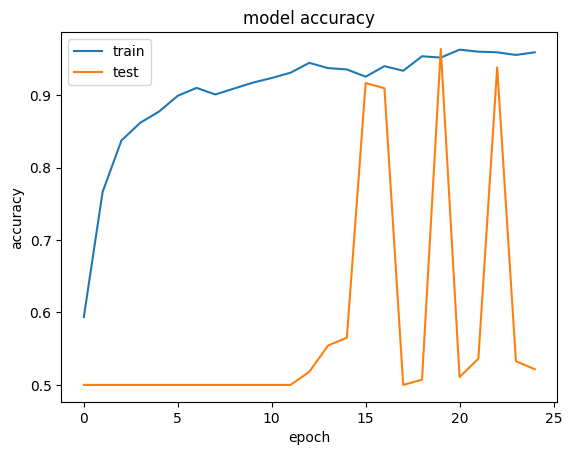

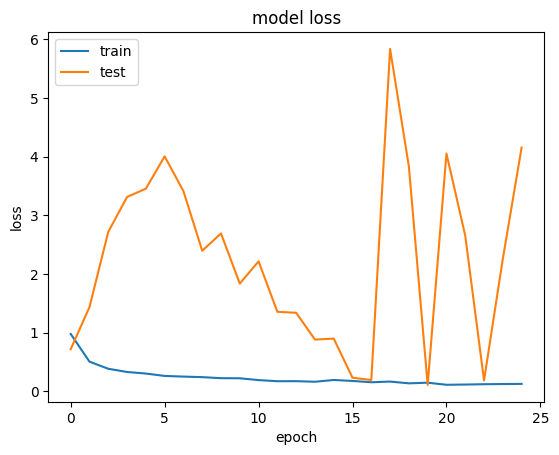

selu
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_35 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                 

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 batch_normalization_38 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               1180160   
                                                                 
 batch_normalization_39 (Bat  (None, 512)              2048      
 chNormalization)                                                
          

Epoch 22/25
35/35 [==============================] - ETA: 0s - loss: 0.1665 - accuracy: 0.9327
Epoch 22: val_accuracy did not improve from 0.96014
35/35 [==============================] - 12s 323ms/step - loss: 0.1665 - accuracy: 0.9327 - val_loss: 2.5184 - val_accuracy: 0.5362
Epoch 23/25
35/35 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 0.9436
Epoch 23: val_accuracy did not improve from 0.96014
35/35 [==============================] - 13s 353ms/step - loss: 0.1575 - accuracy: 0.9436 - val_loss: 2.8477 - val_accuracy: 0.5471
Epoch 24/25
35/35 [==============================] - ETA: 0s - loss: 0.1466 - accuracy: 0.9355
Epoch 24: val_accuracy did not improve from 0.96014
35/35 [==============================] - 12s 349ms/step - loss: 0.1466 - accuracy: 0.9355 - val_loss: 4.1321 - val_accuracy: 0.5036
Epoch 25/25
35/35 [==============================] - ETA: 0s - loss: 0.1462 - accuracy: 0.9473
Epoch 25: val_accuracy did not improve from 0.96014
35/35 [=========

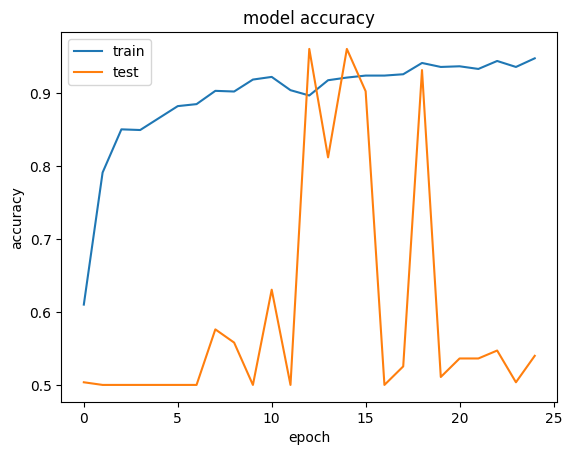

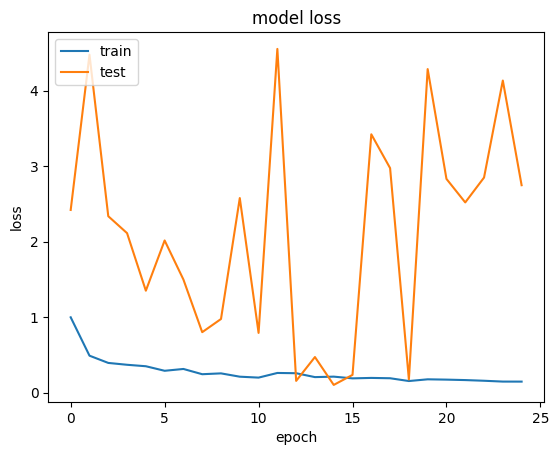

LeakyReLU
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_42 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                            

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_47 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 64)                16448     
                                                                 
 batch_normalization_48 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 2)                 130       
          

Epoch 25/25
35/35 [==============================] - ETA: 0s - loss: 0.1510 - accuracy: 0.9436
Epoch 25: val_accuracy did not improve from 0.97464
35/35 [==============================] - 12s 341ms/step - loss: 0.1510 - accuracy: 0.9436 - val_loss: 0.3655 - val_accuracy: 0.8261
Training time: 0:05:12.131225
Test score: 0.08223898708820343
Test accuracy: 0.9746376872062683
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


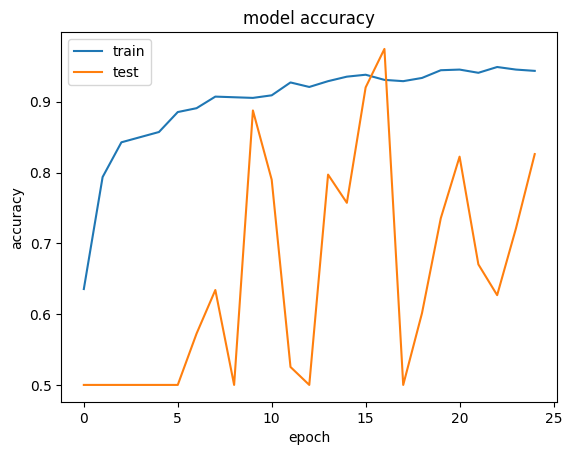

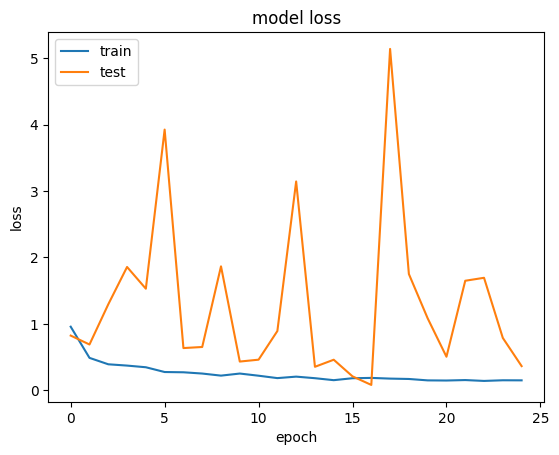

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [43]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'max',25)
    

In [49]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.974638
1,relu,64,max,25,0.981884
2,elu,64,max,25,0.938406
3,gelu,64,max,25,0.963768
4,selu,64,max,25,0.960145
5,LeakyReLU,64,max,25,0.974638


### Finding best activation function with average pooling

relu
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 63, 63, 64)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization_49 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                 

35/35 [==============================] - 10s 271ms/step - loss: 0.1792 - accuracy: 0.9318 - val_loss: 0.2212 - val_accuracy: 0.8913
Epoch 16/25
35/35 [==============================] - ETA: 0s - loss: 0.1735 - accuracy: 0.9309
Epoch 16: val_accuracy improved from 0.89130 to 0.89855, saving model to model_64_relu_average.hdf5
35/35 [==============================] - 10s 275ms/step - loss: 0.1735 - accuracy: 0.9309 - val_loss: 0.2082 - val_accuracy: 0.8986
Epoch 17/25
35/35 [==============================] - ETA: 0s - loss: 0.2084 - accuracy: 0.9255
Epoch 17: val_accuracy did not improve from 0.89855
35/35 [==============================] - 9s 242ms/step - loss: 0.2084 - accuracy: 0.9255 - val_loss: 0.6779 - val_accuracy: 0.6812
Epoch 18/25
35/35 [==============================] - ETA: 0s - loss: 0.1654 - accuracy: 0.9391
Epoch 18: val_accuracy did not improve from 0.89855
35/35 [==============================] - 9s 256ms/step - loss: 0.1654 - accuracy: 0.9391 - val_loss: 0.2420 - val_ac

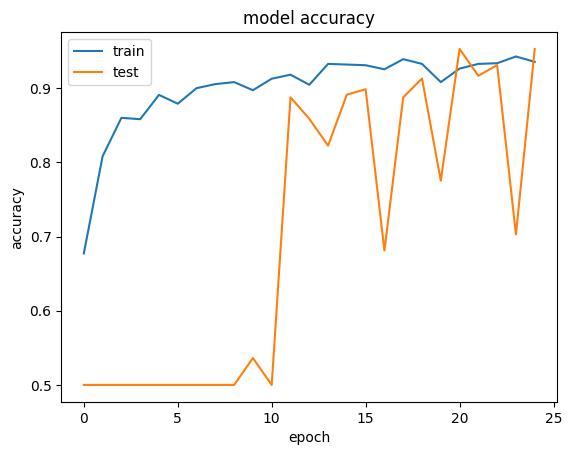

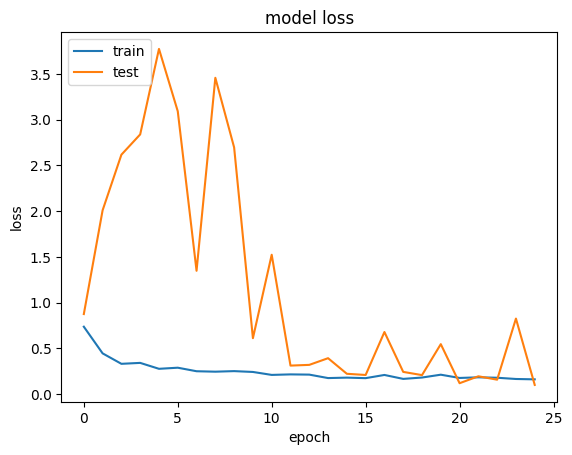

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


elu
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_4 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_56 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_5 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                  

Epoch 16/25
35/35 [==============================] - ETA: 0s - loss: 0.2860 - accuracy: 0.8855
Epoch 16: val_accuracy did not improve from 0.86594
35/35 [==============================] - 10s 288ms/step - loss: 0.2860 - accuracy: 0.8855 - val_loss: 1.1251 - val_accuracy: 0.6630
Epoch 17/25
35/35 [==============================] - ETA: 0s - loss: 0.2394 - accuracy: 0.8964
Epoch 17: val_accuracy did not improve from 0.86594
35/35 [==============================] - 10s 287ms/step - loss: 0.2394 - accuracy: 0.8964 - val_loss: 0.4851 - val_accuracy: 0.8406
Epoch 18/25
35/35 [==============================] - ETA: 0s - loss: 0.2508 - accuracy: 0.8964
Epoch 18: val_accuracy improved from 0.86594 to 0.93116, saving model to model_64_elu_average.hdf5
35/35 [==============================] - 11s 305ms/step - loss: 0.2508 - accuracy: 0.8964 - val_loss: 0.1627 - val_accuracy: 0.9312
Epoch 19/25
35/35 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.9173
Epoch 19: val_accurac

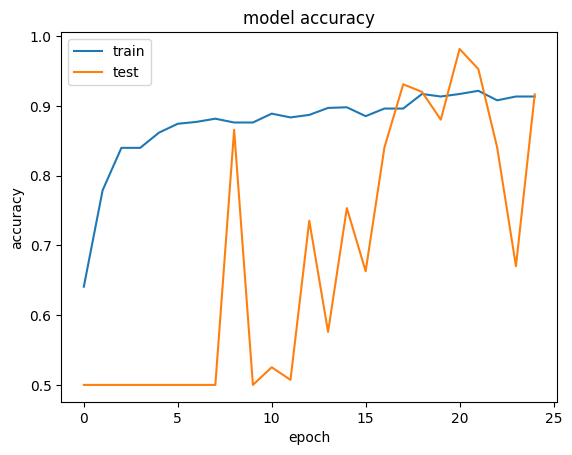

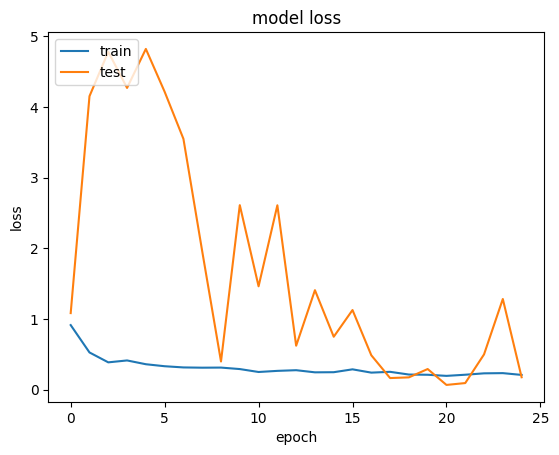

gelu
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_8 (Averag  (None, 63, 63, 64)       0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_63 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_9 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                 

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


                                                                 
 average_pooling2d_10 (Avera  (None, 14, 14, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_65 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 average_pooling2d_11 (Avera  (None, 6, 6, 64)         0         
 gePooling2D)                                                    
                                                                 
 dropout_18 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 batch_normalization_66 (Bat  (None, 6, 6, 64)         256       
 chNormali

Epoch 20/25
35/35 [==============================] - ETA: 0s - loss: 0.1851 - accuracy: 0.9236
Epoch 20: val_accuracy improved from 0.88768 to 0.92029, saving model to model_64_gelu_average.hdf5
35/35 [==============================] - 16s 452ms/step - loss: 0.1851 - accuracy: 0.9236 - val_loss: 0.1464 - val_accuracy: 0.9203
Epoch 21/25
35/35 [==============================] - ETA: 0s - loss: 0.1978 - accuracy: 0.9191
Epoch 21: val_accuracy did not improve from 0.92029
35/35 [==============================] - 15s 428ms/step - loss: 0.1978 - accuracy: 0.9191 - val_loss: 0.5027 - val_accuracy: 0.8514
Epoch 22/25
35/35 [==============================] - ETA: 0s - loss: 0.1749 - accuracy: 0.9255
Epoch 22: val_accuracy improved from 0.92029 to 0.93841, saving model to model_64_gelu_average.hdf5
35/35 [==============================] - 19s 528ms/step - loss: 0.1749 - accuracy: 0.9255 - val_loss: 0.1234 - val_accuracy: 0.9384
Epoch 23/25
35/35 [==============================] - ETA: 0s - loss

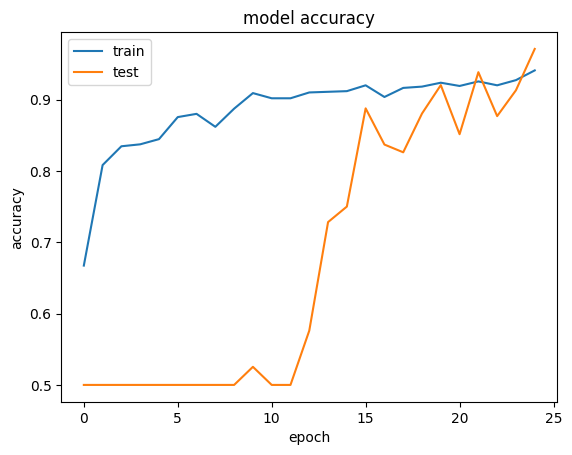

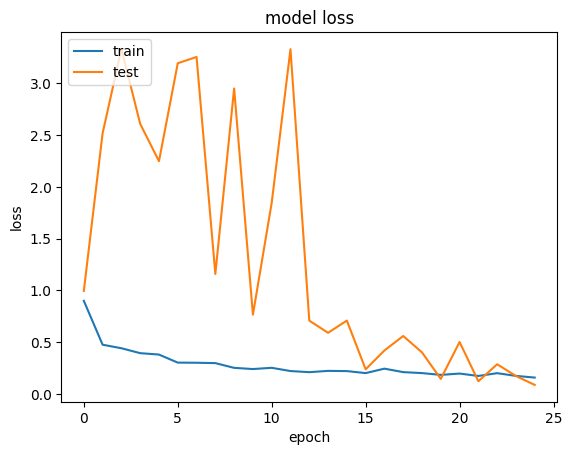

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


selu
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_12 (Avera  (None, 63, 63, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_70 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_41 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_13 (Avera  (None, 30, 30, 64)       0         
 gePooling2D)                                                    
                                                

35/35 [==============================] - 12s 334ms/step - loss: 0.2783 - accuracy: 0.8818 - val_loss: 0.2890 - val_accuracy: 0.8442
Epoch 16/25
35/35 [==============================] - ETA: 0s - loss: 0.2646 - accuracy: 0.8773
Epoch 16: val_accuracy did not improve from 0.87681
35/35 [==============================] - 12s 328ms/step - loss: 0.2646 - accuracy: 0.8773 - val_loss: 1.1379 - val_accuracy: 0.6123
Epoch 17/25
35/35 [==============================] - ETA: 0s - loss: 0.2515 - accuracy: 0.8945
Epoch 17: val_accuracy did not improve from 0.87681
35/35 [==============================] - 12s 340ms/step - loss: 0.2515 - accuracy: 0.8945 - val_loss: 2.7031 - val_accuracy: 0.5036
Epoch 18/25
35/35 [==============================] - ETA: 0s - loss: 0.2969 - accuracy: 0.8773
Epoch 18: val_accuracy did not improve from 0.87681
35/35 [==============================] - 12s 325ms/step - loss: 0.2969 - accuracy: 0.8773 - val_loss: 0.4126 - val_accuracy: 0.7790
Epoch 19/25
35/35 [============

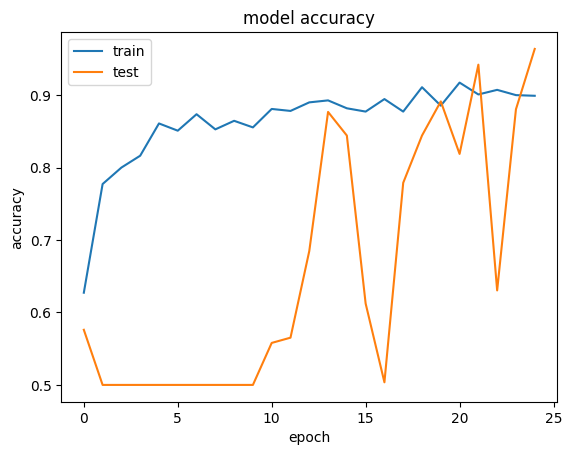

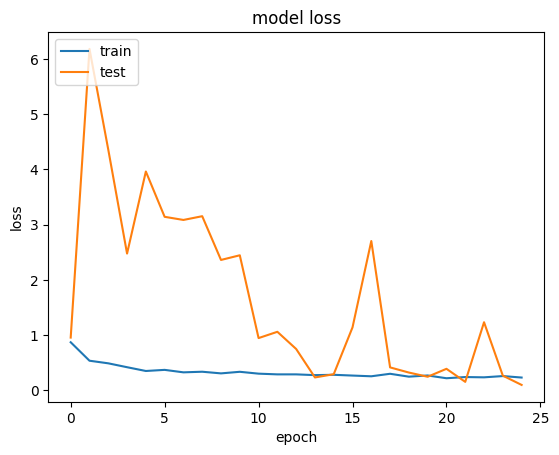

LeakyReLU
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 average_pooling2d_16 (Avera  (None, 63, 63, 64)       0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_77 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 average_pooling2d_17 (Avera  (None, 30, 30, 64)       0         
 gePooling2D)                                                    
                                           

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


 dropout_22 (Dropout)        (None, 6, 6, 64)          0         
                                                                 
 batch_normalization_80 (Bat  (None, 6, 6, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_11 (Flatten)        (None, 2304)              0         
                                                                 
 dense_44 (Dense)            (None, 512)               1180160   
                                                                 
 batch_normalization_81 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_45 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_82 (Bat  (None, 256)              1024      
 chNormali

Epoch 23/25
35/35 [==============================] - ETA: 0s - loss: 0.2108 - accuracy: 0.9127
Epoch 23: val_accuracy did not improve from 0.92391
35/35 [==============================] - 11s 299ms/step - loss: 0.2108 - accuracy: 0.9127 - val_loss: 0.1918 - val_accuracy: 0.9094
Epoch 24/25
35/35 [==============================] - ETA: 0s - loss: 0.1948 - accuracy: 0.9191
Epoch 24: val_accuracy did not improve from 0.92391
35/35 [==============================] - 11s 296ms/step - loss: 0.1948 - accuracy: 0.9191 - val_loss: 0.2699 - val_accuracy: 0.8841
Epoch 25/25
35/35 [==============================] - ETA: 0s - loss: 0.2118 - accuracy: 0.9200
Epoch 25: val_accuracy did not improve from 0.92391
35/35 [==============================] - 11s 303ms/step - loss: 0.2118 - accuracy: 0.9200 - val_loss: 1.4816 - val_accuracy: 0.6341
Training time: 0:04:40.923863
Test score: 0.15558262169361115
Test accuracy: 0.9239130616188049
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


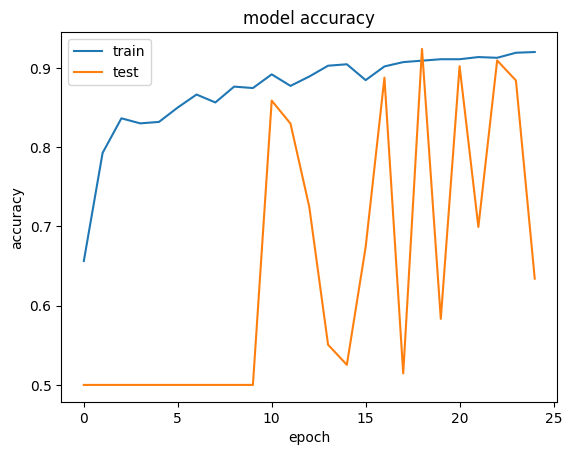

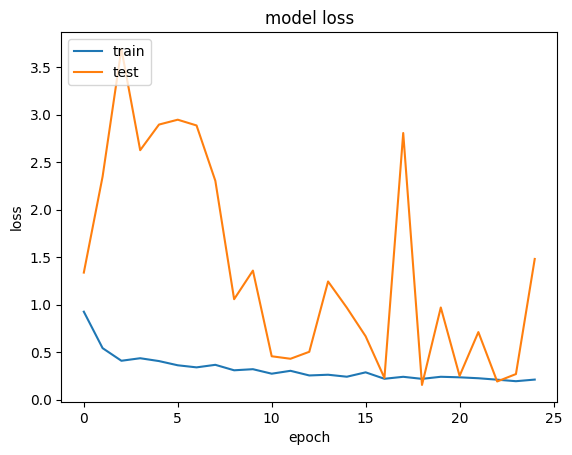

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [50]:
for i in act:
    print(i)
#     print(type(i))
    CNN_model(64,i,'average',25)

In [51]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.974638
1,relu,64,max,25,0.981884
2,elu,64,max,25,0.938406
3,gelu,64,max,25,0.963768
4,selu,64,max,25,0.960145
5,LeakyReLU,64,max,25,0.974638
6,relu,64,average,25,0.952899
7,elu,64,average,25,0.981884
8,gelu,64,average,25,0.971014
9,selu,64,average,25,0.963768


In [53]:
gk = df_r.groupby('pooling').mean()
gk.head()

<ipython-input-53-88fbdc02e871>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gk = df_r.groupby('pooling').mean()


,test_accuracy
pooling,
average,0.958696
max,0.965580


In [52]:
gk = df_r.groupby('activation_function').mean()
gk.head()

<ipython-input-52-92edb843cd6a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gk = df_r.groupby('activation_function').mean()


,test_accuracy
activation_function,
LeakyReLU,0.949275
elu,0.960145
gelu,0.967391
relu,0.969807
selu,0.961957


## Conclusion regarding the performance of Activation function

seeing all the results relu and elu seems to give the best results for max and average type poolings, however on average relu gives best result hence we will chose gelu for futrther analysis

## Conclusion regarding the performance of pooling techniques

Max pooling gives the best results compared overall

## The best activation function is 'LeakyRELU'   and the best pooling technique is 'Maxpooling'  

## Finding the effect of number of filters on our best activation and pooling model

16
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_84 (Bat  (None, 63, 63, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_49 (Conv2D)          (None, 61, 61, 16)        2320      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                            
                                                  

35/35 [==============================] - 5s 150ms/step - loss: 0.2375 - accuracy: 0.9127 - val_loss: 0.6666 - val_accuracy: 0.7029
Epoch 16/25
35/35 [==============================] - ETA: 0s - loss: 0.2106 - accuracy: 0.9200
Epoch 16: val_accuracy improved from 0.70290 to 0.89493, saving model to model_16_relu_max.hdf5
35/35 [==============================] - 6s 157ms/step - loss: 0.2106 - accuracy: 0.9200 - val_loss: 0.3499 - val_accuracy: 0.8949
Epoch 17/25
35/35 [==============================] - ETA: 0s - loss: 0.2107 - accuracy: 0.9127
Epoch 17: val_accuracy did not improve from 0.89493
35/35 [==============================] - 5s 146ms/step - loss: 0.2107 - accuracy: 0.9127 - val_loss: 1.2208 - val_accuracy: 0.5652
Epoch 18/25
35/35 [==============================] - ETA: 0s - loss: 0.1974 - accuracy: 0.9173
Epoch 18: val_accuracy did not improve from 0.89493
35/35 [==============================] - 5s 151ms/step - loss: 0.1974 - accuracy: 0.9173 - val_loss: 2.2419 - val_accuracy

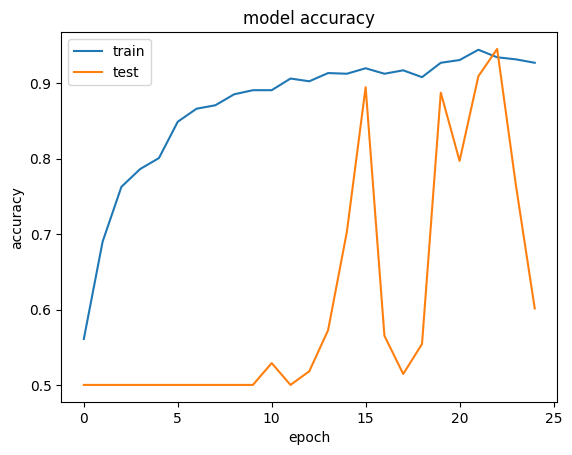

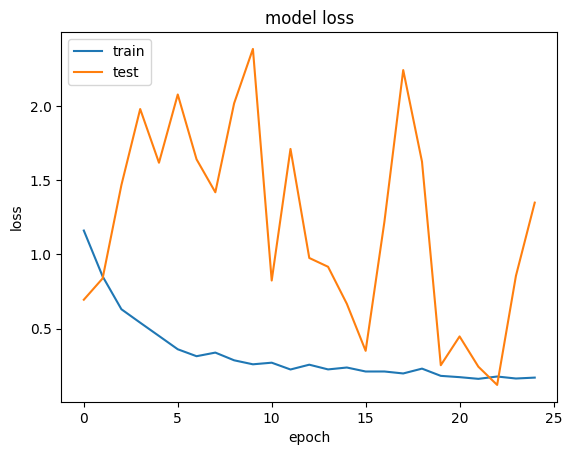

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


32
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_91 (Bat  (None, 63, 63, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_53 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                  

35/35 [==============================] - ETA: 0s - loss: 0.2147 - accuracy: 0.9145
Epoch 15: val_accuracy did not improve from 0.86594
35/35 [==============================] - 7s 179ms/step - loss: 0.2147 - accuracy: 0.9145 - val_loss: 0.5707 - val_accuracy: 0.6957
Epoch 16/25
35/35 [==============================] - ETA: 0s - loss: 0.1792 - accuracy: 0.9255
Epoch 16: val_accuracy improved from 0.86594 to 0.97826, saving model to model_32_relu_max.hdf5
35/35 [==============================] - 7s 199ms/step - loss: 0.1792 - accuracy: 0.9255 - val_loss: 0.0976 - val_accuracy: 0.9783
Epoch 17/25
35/35 [==============================] - ETA: 0s - loss: 0.1862 - accuracy: 0.9200
Epoch 17: val_accuracy did not improve from 0.97826
35/35 [==============================] - 7s 188ms/step - loss: 0.1862 - accuracy: 0.9200 - val_loss: 0.1406 - val_accuracy: 0.9457
Epoch 18/25
35/35 [==============================] - ETA: 0s - loss: 0.1684 - accuracy: 0.9382
Epoch 18: val_accuracy did not improve 

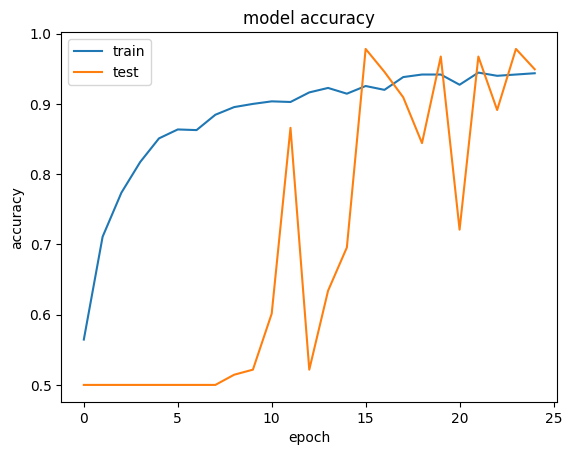

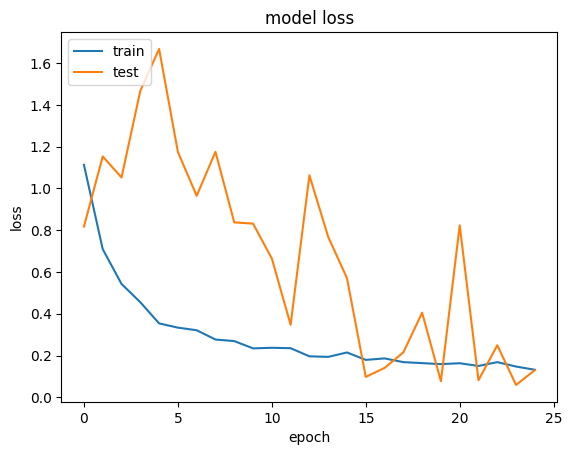

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


64
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_98 (Bat  (None, 63, 63, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_57 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                  

35/35 [==============================] - 12s 328ms/step - loss: 0.2001 - accuracy: 0.9200 - val_loss: 0.4383 - val_accuracy: 0.7862
Epoch 16/25
35/35 [==============================] - ETA: 0s - loss: 0.1682 - accuracy: 0.9336
Epoch 16: val_accuracy did not improve from 0.84420
35/35 [==============================] - 12s 331ms/step - loss: 0.1682 - accuracy: 0.9336 - val_loss: 0.8914 - val_accuracy: 0.6232
Epoch 17/25
35/35 [==============================] - ETA: 0s - loss: 0.1881 - accuracy: 0.9200
Epoch 17: val_accuracy did not improve from 0.84420
35/35 [==============================] - 11s 310ms/step - loss: 0.1881 - accuracy: 0.9200 - val_loss: 0.7934 - val_accuracy: 0.6775
Epoch 18/25
35/35 [==============================] - ETA: 0s - loss: 0.1568 - accuracy: 0.9309
Epoch 18: val_accuracy improved from 0.84420 to 0.93478, saving model to model_64_relu_max.hdf5
35/35 [==============================] - 11s 317ms/step - loss: 0.1568 - accuracy: 0.9309 - val_loss: 0.1547 - val_accu

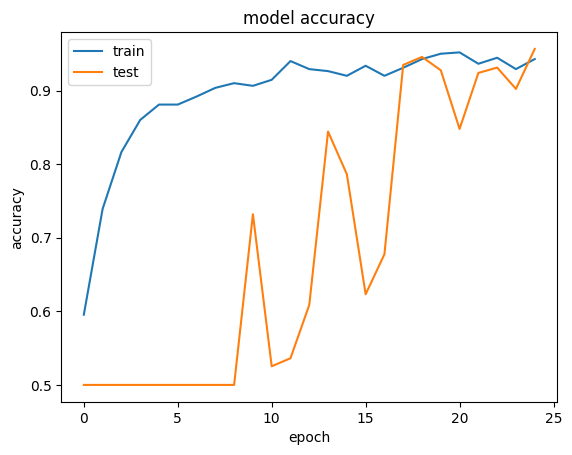

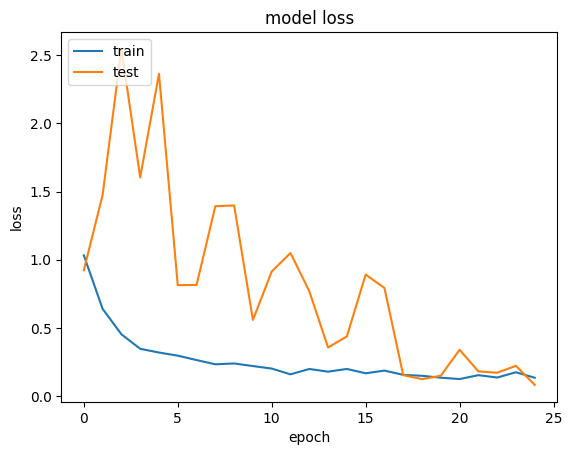

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


128
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 63, 63, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_105 (Ba  (None, 63, 63, 128)      512       
 tchNormalization)                                               
                                                                 
 conv2d_61 (Conv2D)          (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                 

Epoch 16/25
35/35 [==============================] - ETA: 0s - loss: 0.1539 - accuracy: 0.9409
Epoch 16: val_accuracy did not improve from 0.86957
35/35 [==============================] - 23s 648ms/step - loss: 0.1539 - accuracy: 0.9409 - val_loss: 0.4473 - val_accuracy: 0.7464
Epoch 17/25
35/35 [==============================] - ETA: 0s - loss: 0.1746 - accuracy: 0.9373
Epoch 17: val_accuracy did not improve from 0.86957
35/35 [==============================] - 23s 660ms/step - loss: 0.1746 - accuracy: 0.9373 - val_loss: 4.1666 - val_accuracy: 0.5181
Epoch 18/25
35/35 [==============================] - ETA: 0s - loss: 0.1521 - accuracy: 0.9391
Epoch 18: val_accuracy did not improve from 0.86957
35/35 [==============================] - 23s 639ms/step - loss: 0.1521 - accuracy: 0.9391 - val_loss: 0.5237 - val_accuracy: 0.8043
Epoch 19/25
35/35 [==============================] - ETA: 0s - loss: 0.1706 - accuracy: 0.9291
Epoch 19: val_accuracy did not improve from 0.86957
35/35 [=========

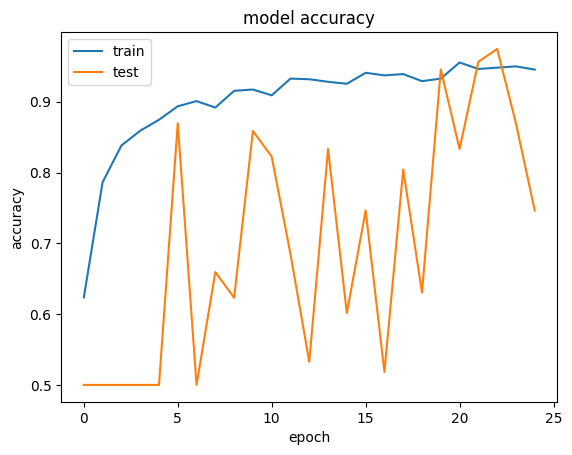

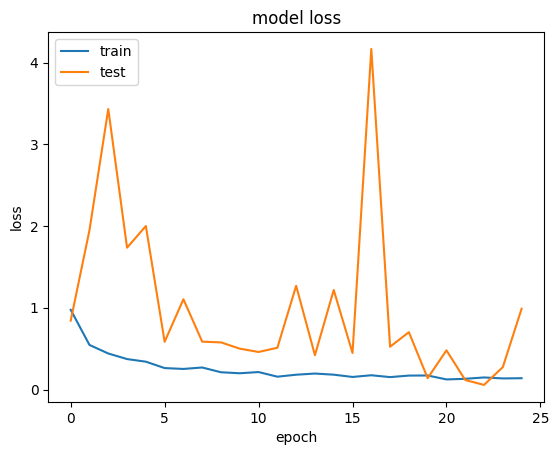

<ipython-input-40-653d1271906e>:132: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_r=df_r.append({'activation_function':activation_function,'number_filters':filt, 'pooling':pool,


In [54]:
f= [16,32,64,128]

for i in f:
    print(i)
#     print(type(i))
    CNN_model(i,'relu','max',25)

In [55]:
df_r

,activation_function,number_filters,pooling,epochs,test_accuracy
0,relu,62,max,30,0.974638
1,relu,64,max,25,0.981884
2,elu,64,max,25,0.938406
3,gelu,64,max,25,0.963768
4,selu,64,max,25,0.960145
5,LeakyReLU,64,max,25,0.974638
6,relu,64,average,25,0.952899
7,elu,64,average,25,0.981884
8,gelu,64,average,25,0.971014
9,selu,64,average,25,0.963768


## Conculsion of the effect of number of results

From the results we can see increasing the number of filters does increase the accuaracy upto a point after that the accuracy can decrease so we need to find the optimal number of filters. 

### from above results 32 filters give the best results

## the best model is with 'relu' activation function 64 filters and maxpooling can give results from accuracy of 0.95 to 0.98

Saving results in a csv file

In [57]:
df_results1=df_r.copy()
df_results1['dataset']='FaceMask Dataset'
df_results1.head()

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
0,relu,62,max,30,0.974638,FaceMask Dataset
1,relu,64,max,25,0.981884,FaceMask Dataset
2,elu,64,max,25,0.938406,FaceMask Dataset
3,gelu,64,max,25,0.963768,FaceMask Dataset
4,selu,64,max,25,0.960145,FaceMask Dataset


In [58]:
df_results1.to_csv('df_results1_d3.csv',index=False)

In [59]:
df_results1.sort_values('test_accuracy',ascending= False)

,activation_function,number_filters,pooling,epochs,test_accuracy,dataset
1,relu,64,max,25,0.981884,FaceMask Dataset
7,elu,64,average,25,0.981884,FaceMask Dataset
12,relu,32,max,25,0.978261,FaceMask Dataset
0,relu,62,max,30,0.974638,FaceMask Dataset
5,LeakyReLU,64,max,25,0.974638,FaceMask Dataset
14,relu,128,max,25,0.974638,FaceMask Dataset
8,gelu,64,average,25,0.971014,FaceMask Dataset
3,gelu,64,max,25,0.963768,FaceMask Dataset
9,selu,64,average,25,0.963768,FaceMask Dataset
4,selu,64,max,25,0.960145,FaceMask Dataset


Imagenet models were run on googlecolab notebooks

# Using imagenet winner model

## Resnet

94765736/94765736 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization

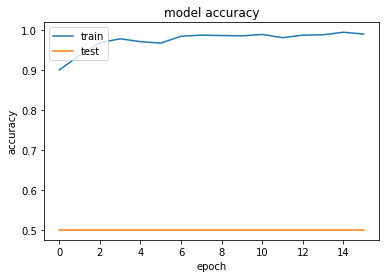

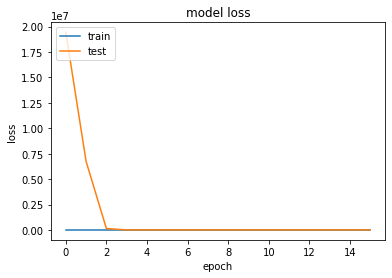

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

resnet = tf.keras.applications.ResNet50(input_shape=(x_train.shape[1:]), include_top=False,
                                        weights='imagenet', classes=num_classes)

x = GlobalAveragePooling2D()(resnet.output)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)

output = Dense(units=num_classes,activation = 'softmax')(x)
model_resnet = Model(resnet.input, output)
model_resnet.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_resnet.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

now = datetime.now
t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'resnet_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_resnet.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)



print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



# Inception_V3

In [ ]:



from tensorflow.keras.applications.inception_v3 import preprocess_input

InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, 
                                                      input_shape=(x_train.shape[1:]))

for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=num_classes, activation='softmax')(x)
model_inception = Model(InceptionV3_model.input, output)

model_inception.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_inception.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'inception_v3_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')



epoch=25

history = model_inception.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)


print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



87910968/87910968 [==============================] - 5s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                           

NameError: ignored

In [ ]:
model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.023968474939465523
Test accuracy: 0.9963768124580383


# VGG

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

58889256/58889256 [==============================] - 3s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                            

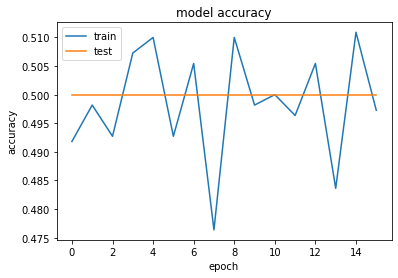

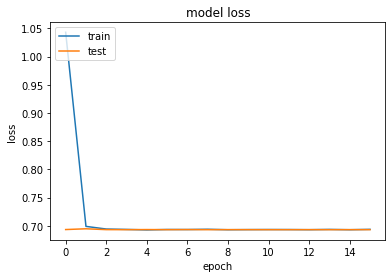

In [ ]:


vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=x_train.shape[1:],classes=58)

x = vgg16.output


x = GlobalAveragePooling2D()(x)

x = Dense(units=512, activation='relu')(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.5)(x)



output = Dense(units=num_classes,activation = 'softmax')(x)
model_vgg16 = Model(vgg16.input, output)
model_vgg16.summary()


batch_size = 32

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

#     opt = tf.keras.optimizers.Adam(learning_rate=0.1)


# Let's train the model_1 using RMSprop
model_vgg16.compile(loss='categorical_crossentropy',
            optimizer=opt,
            metrics=['accuracy'])

now = datetime.now
t= now()

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, baseline=0.2, restore_best_weights=True)


filepath = 'vgg16_model.hdf5'
checkpoint = ModelCheckpoint( 
                            filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=True,
                             mode='max')


epoch=25

history = model_vgg16.fit(datagen_preprocessing.flow(x_train,y_train,
                                    batch_size=batch_size, 
                                    seed=27,
                                    shuffle=False),
                            batch_size=batch_size,
                            epochs=epoch,
                            validation_data=(x_test, y_test),
                            callbacks=[checkpoint,es],
                            shuffle=True)



print('Training time: %s' % (now() - t))


model_l2 = load_model(filepath)

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

